In [3]:
import pandas as pd

In [16]:
df = pd.read_excel("sdg_result.xlsx")
index_df=pd.read_excel("after_cleansing.xlsx")
df=df[:50]
print(len(df))
indices=index_df['종목명'][:50]

50


In [17]:
df.index=indices

In [19]:
df.head()

,Unnamed: 0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17
종목명,,,,,,,,,,,,,,,,,,
삼성전자,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1
SK하이닉스,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0
NAVER,2,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0
삼성바이오로직스,3,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0
카카오,4,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1


In [20]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df.dtypes.head()

s1    int64
s2    int64
s3    int64
s4    int64
s5    int64
dtype: object

In [29]:
for i in df.columns:
    df[i]  = pd.to_numeric(df[i])

print(len(df))


50


In [30]:
from sklearn.cluster import KMeans
clusters = 4
km1 = KMeans(n_clusters=clusters, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
km1.fit(df)

  
print(km1.labels_)

[0 3 2 0 2 0 0 3 3 3 2 3 2 0 3 2 3 3 1 1 2 3 3 1 0 1 1 2 1 0 2 1 3 3 3 0 2
 2 2 0 1 2 3 0 3 0 3 1 2 0]


In [32]:
from matplotlib import colors as mcolors
import math
   
''' Generating different colors in ascending order 
                                of their hsv values '''
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]

skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]
   

In [34]:
from sklearn.decomposition import PCA
  
pca = PCA(4)
pca.fit(df)
  
pca_data = pd.DataFrame(pca.transform(df))
pca_data.index=indices
  
print(pca_data.head())

                 0         1         2         3
종목명                                             
삼성전자      0.774521  0.043758  0.308294  0.463459
SK하이닉스    0.906146 -0.027100 -0.161846  0.053894
NAVER    -0.595200 -0.966026 -0.874512  0.528177
삼성바이오로직스  0.513142 -0.725600  0.358133  0.572362
카카오      -0.652670 -1.023689 -0.752237 -0.296620


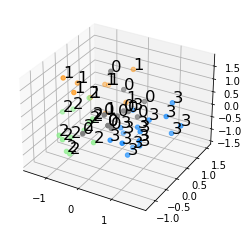

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
   
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2], 
           c = list(map(lambda label : cluster_colors[label],
                                            km1.labels_)))
   
str_labels = list(map(lambda label:'% s' % label, km1.labels_))
   
list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s = str_label, size = 16.5,
        zorder = 20, color = 'k'), pca_data[0], pca_data[1],
        pca_data[2], str_labels))
   
plt.show()

In [36]:
km1.labels_

array([0, 3, 2, 0, 2, 0, 0, 3, 3, 3, 2, 3, 2, 0, 3, 2, 3, 3, 1, 1, 2, 3,
       3, 1, 0, 1, 1, 2, 1, 0, 2, 1, 3, 3, 3, 0, 2, 2, 2, 0, 1, 2, 3, 0,
       3, 0, 3, 1, 2, 0], dtype=int32)

In [38]:
label_ls=km1.labels_.tolist()
group1=[]
group2=[]
group3=[]
group4=[]
for i in range(50):

    if label_ls[i] ==0:
        group1.append(i)
    elif label_ls[i] ==1:
        group2.append(i)
    elif label_ls[i] ==2:
        group3.append(i)
    elif label_ls[i] ==3:
        group4.append(i)


In [39]:
group1

[0, 3, 5, 6, 13, 24, 29, 35, 39, 43, 45, 49]

In [40]:
df_group1=df.iloc[group1]
df_group2=df.iloc[group2]
df_group3=df.iloc[group3]
df_group4=df.iloc[group4]

In [41]:
df_group1.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17
종목명,,,,,,,,,,,,,,,,,
삼성전자,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1
삼성바이오로직스,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0
삼성SDI,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0
기아,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0
SK바이오사이언스,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1


In [18]:
df_group1.to_excel('group1.xlsx')
df_group2.to_excel('group2.xlsx')
df_group3.to_excel('group3.xlsx')
df_group4.to_excel('group4.xlsx')

50


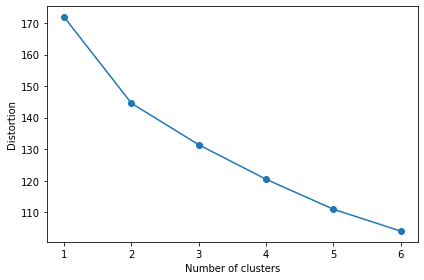

In [19]:
print(len(df))

distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df)
    distortions .append(km.inertia_)
plt.plot(range(1,7), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

print(len(df))

ac = AgglomerativeClustering(n_clusters=4, affinity='cityblock', linkage='complete')
labels = ac.fit_predict(df)
print('Cluster labels: %s' % labels)
print(len(labels))

50
Cluster labels: [0 1 2 0 2 1 0 1 0 2 2 2 2 1 2 2 1 2 0 3 2 1 1 0 1 3 0 0 0 1 2 0 2 1 2 1 2
 2 2 1 0 2 1 1 1 1 1 3 2 1]
50


In [21]:
from scipy.spatial.distance import pdist,squareform

df.index=labels

row_dist = pd.DataFrame(squareform(pdist(df, metric='cityblock')), columns=labels, index=labels)
row_dist

,0,1,2,0,2,1,0,1,0,2,...,0,2,1,1,1,1,1,3,2,1
0,0.0,5.0,7.0,3.0,7.0,7.0,2.0,5.0,4.0,6.0,...,9.0,5.0,5.0,4.0,2.0,5.0,5.0,10.0,8.0,4.0
1,5.0,0.0,6.0,4.0,8.0,4.0,5.0,4.0,5.0,5.0,...,10.0,6.0,2.0,3.0,3.0,4.0,4.0,7.0,7.0,7.0
2,7.0,6.0,0.0,4.0,2.0,4.0,7.0,10.0,7.0,5.0,...,8.0,4.0,6.0,7.0,7.0,6.0,10.0,9.0,3.0,9.0
0,3.0,4.0,4.0,0.0,6.0,4.0,3.0,6.0,5.0,7.0,...,8.0,6.0,4.0,3.0,5.0,4.0,6.0,11.0,5.0,5.0
2,7.0,8.0,2.0,6.0,0.0,4.0,9.0,10.0,9.0,5.0,...,8.0,6.0,8.0,7.0,7.0,6.0,10.0,9.0,3.0,9.0
1,7.0,4.0,4.0,4.0,4.0,0.0,7.0,8.0,9.0,9.0,...,8.0,6.0,6.0,3.0,7.0,4.0,8.0,9.0,3.0,7.0
0,2.0,5.0,7.0,3.0,9.0,7.0,0.0,7.0,2.0,8.0,...,7.0,5.0,5.0,4.0,4.0,5.0,7.0,10.0,8.0,6.0
1,5.0,4.0,10.0,6.0,10.0,8.0,7.0,0.0,7.0,5.0,...,14.0,10.0,4.0,5.0,5.0,6.0,2.0,11.0,11.0,7.0
0,4.0,5.0,7.0,5.0,9.0,9.0,2.0,7.0,0.0,6.0,...,7.0,7.0,3.0,6.0,4.0,7.0,7.0,8.0,10.0,8.0
2,6.0,5.0,5.0,7.0,5.0,9.0,8.0,5.0,6.0,0.0,...,11.0,7.0,5.0,8.0,4.0,7.0,7.0,8.0,8.0,10.0


In [23]:

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='cityblock'), method='complete')
df_hier=pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

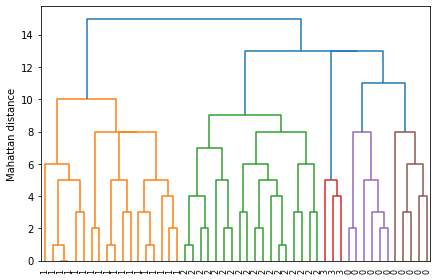

In [24]:
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Mahattan distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()